In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [52]:
df = pd.read_csv('data/county_unemployment.csv')
df["Metro"] = ["Metro" if x == 1 else "Non-Metro" for x in df.Metro_2013]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72133 entries, 0 to 72132
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FIPS_Code                        72133 non-null  int64  
 1   State                            72133 non-null  object 
 2   Area_Name                        72133 non-null  object 
 3   Rural_Urban_Continuum_Code_2013  72133 non-null  float64
 4   Urban_Influence_Code_2013        72133 non-null  float64
 5   Metro_2013                       72133 non-null  float64
 6   Median_Household_Income_2021     72133 non-null  float64
 7   Year                             72133 non-null  int64  
 8   Employed                         72133 non-null  float64
 9   Unemployed                       72133 non-null  float64
 10  Metro                            72133 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ MB


,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Median_Household_Income_2021,Year,Employed,Unemployed,Metro
0,1001,AL,Autauga,2.0,2.0,1.0,66444.0,2000,20971.0,890.0,Metro
1,1001,AL,Autauga,2.0,2.0,1.0,66444.0,2001,21166.0,915.0,Metro
2,1001,AL,Autauga,2.0,2.0,1.0,66444.0,2002,21096.0,1065.0,Metro
3,1001,AL,Autauga,2.0,2.0,1.0,66444.0,2003,21557.0,1138.0,Metro
4,1001,AL,Autauga,2.0,2.0,1.0,66444.0,2004,22146.0,1095.0,Metro


,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Median_Household_Income_2021,Year,Employed,Unemployed,Metro
8805,13001,GA,Appling,7.0,9.0,0.0,46530.0,2000,8062.0,457.0,Non-Metro
8806,13001,GA,Appling,7.0,9.0,0.0,46530.0,2001,7812.0,578.0,Non-Metro
8807,13001,GA,Appling,7.0,9.0,0.0,46530.0,2002,7563.0,671.0,Non-Metro
8808,13001,GA,Appling,7.0,9.0,0.0,46530.0,2003,7661.0,588.0,Non-Metro
8809,13001,GA,Appling,7.0,9.0,0.0,46530.0,2004,7684.0,556.0,Non-Metro


Counties:  159


,Employed,Unemployed
Year,,
2000,4055365.0,147334.0
2001,4083538.0,174378.0
2002,4111634.0,229999.0
2003,4187010.0,227282.0
2004,4236308.0,228481.0
2005,4336273.0,261899.0
2006,4474832.0,239048.0
2007,4573308.0,236965.0
2008,4534790.0,328453.0


,Year,Employed,Unemployed,Unemployment Rate
0,2000,4055365.0,147334.0,3.505700
1,2001,4083538.0,174378.0,4.095384
2,2002,4111634.0,229999.0,5.297523
3,2003,4187010.0,227282.0,5.148776
4,2004,4236308.0,228481.0,5.117397
5,2005,4336273.0,261899.0,5.695720
6,2006,4474832.0,239048.0,5.071152
7,2007,4573308.0,236965.0,4.926228
8,2008,4534790.0,328453.0,6.753785
9,2009,4292835.0,499327.0,10.419660


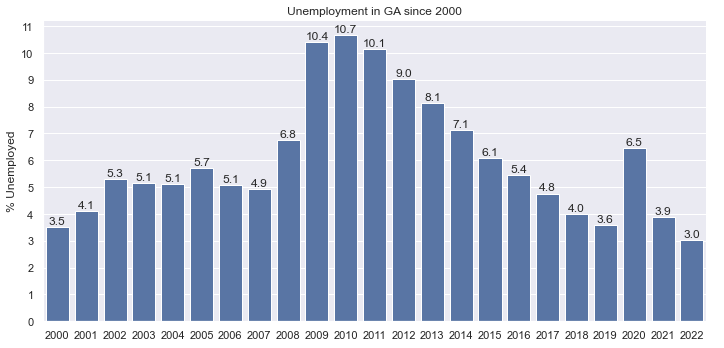

In [103]:
# Part A
# Show how the unemployment rate has changed in GA since 2000
df_ga = df[df.State=="GA"]
display(df_ga.head())
print("Counties: ",len(df_ga.Area_Name.unique())) #validation
# Let's start by grouping by year, considering just employed and unemployed
df_ga_employment = df_ga.groupby(["Year"])[["Employed","Unemployed"]].sum() #each year contains the counties, which must be summed
display(df_ga_employment) 
# Now let's calculate the unemployment rate
df_ga_employment["Unemployment Rate"] = df_ga_employment.Unemployed/(df_ga_employment.Employed + df_ga_employment.Unemployed)*100
# finally, let's plot
df_ga_employment.reset_index(inplace=True)
display(df_ga_employment) # validation
sns.catplot(data=df_ga_employment,x="Year",y="Unemployment Rate",kind="bar",aspect=2)
plt.yticks(range(0,int(df_ga_employment["Unemployment Rate"].max()) + 2));
plt.title("Unemployment in GA since 2000")
plt.ylabel("% Unemployed")
plt.xlabel("")
# put numbers aligned over each bar for clarity
for index,r in df_ga_employment.iterrows():
    plt.text(index,r['Unemployment Rate']+.1,f"{r['Unemployment Rate']:.1f}",ha="center") 


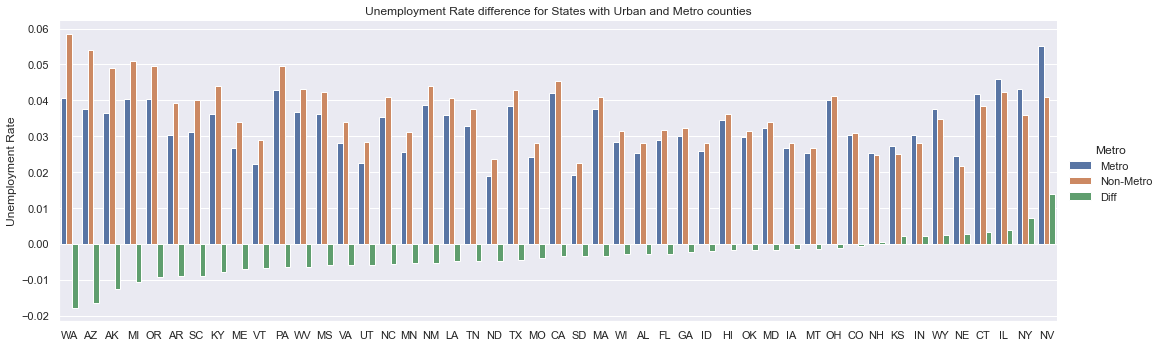

In [105]:
# Part B
# Next we want to compare state unemployment between Metro and Non-Metro areas
df_2022 = df[df.Year==2022].groupby(["State","Metro"])[["Employed","Unemployed"]].sum() #each group contains the state/metro status counties, so sum the group
df_2022["Unemployment Rate"] = df_2022.Unemployed/(df_2022.Employed + df_2022.Unemployed) 
df_2022 = df_2022.reset_index() 
df_2022 = df_2022.pivot(index="State",columns="Metro",values="Unemployment Rate").dropna() # drop states that don't have urban areas, because the comparison is pointless
df_2022["Diff"] = df_2022["Metro"] - df_2022["Non-Metro"]
df_2022 = df_2022.sort_values("Diff").reset_index()
sns.catplot(data=df_2022.melt(id_vars="State"),x="State",y="value",hue="Metro",kind="bar",aspect=3)
plt.ylabel("Unemployment Rate")
plt.xlabel("")
plt.title("Unemployment Rate difference for States with Urban and Metro counties")
plt.show()


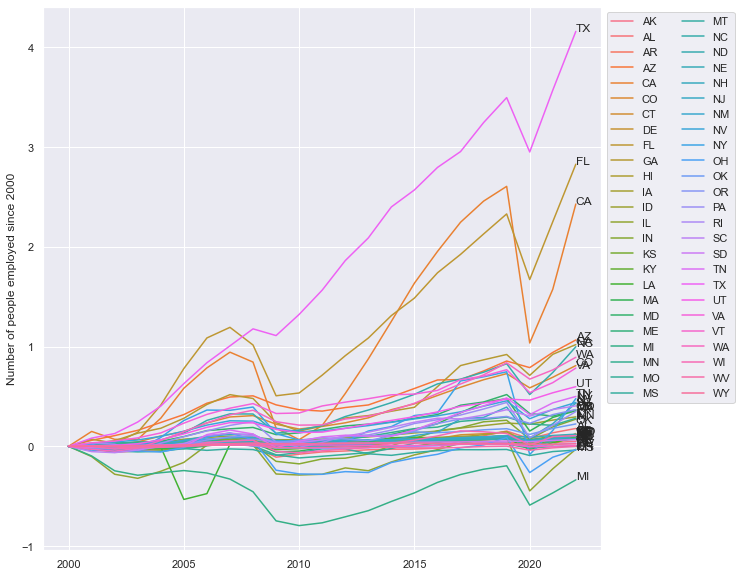

In [106]:
# Part C
# Now show the growth in the number of employed adults in all states since 2000
# The first thing we need to do is figure out how many are employed in ear State/Year combo
df_states = df.groupby(["State","Year"])[["Employed"]].sum()
df_states = df_states.reset_index() # reset index so we can easily pivot
# I really want to see growth, with respect to 2000, so I need to subtract the 2000 value
# To do that, I'm going to pivot into a table of states, instead of state/years
df_states = df_states.pivot(index="State",columns="Year",values="Employed")/1e6 # get the employment in millions
df_states = df_states.apply(lambda x: x-df_states[2000],axis=0) # Now it's easy to subtract a column from the others
df_states_2022 = df_states[2022] # saving this for later plotting
df_states = df_states.reset_index().melt(id_vars="State",value_name="Growth") # bring it back to state,year rows
f,ax = plt.subplots(figsize=(10,10)) # get a big plot
ax = sns.lineplot(data=df_states,x="Year",y="Growth",hue="State") # a line plot shows growth over time
ax.set_ylabel("Number of people employed since 2000")
ax.set_xlabel("")
ax.legend(ncol=2,bbox_to_anchor=(1,1)) #this makes a double columned legend on the side
for index,g in df_states_2022.items(): # put the state name at the end of each line
    plt.text(2022,g,index) 
plt.show() 
# Note, I'm only partially happy with this because of the label overlaps, but there's not a great way to do this that I can think of
# without much effort.  You could try to figure out how to draw a dashed line or something from a bigger legend
# but, I'm relatively happy with showing the states with big differences.  
# an interactive plot would be better here, so you could highlight a specific line

Year,Area_Name,Average
0,Hancock,0.106923
1,Telfair,0.096912
2,Warren,0.094412
3,Taliaferro,0.090763
4,Chattahoochee,0.090516
5,Jefferson,0.089200
6,Jenkins,0.089199
7,Macon,0.088980
8,Wheeler,0.086749
9,Ben Hill,0.085596


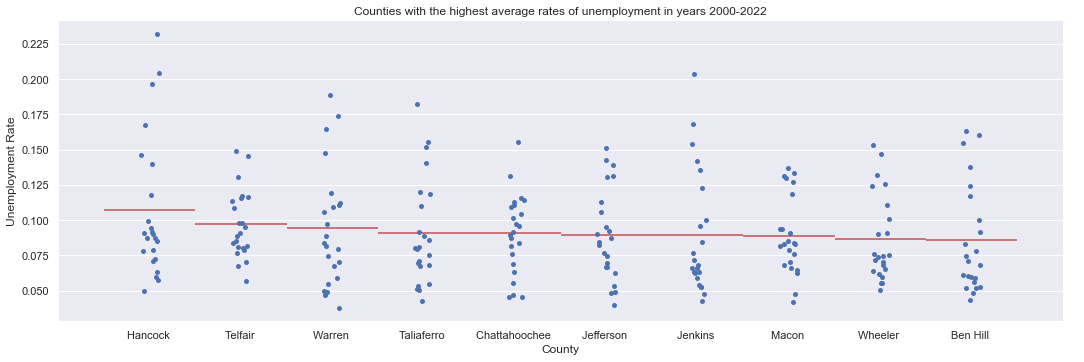

In [107]:
# Part D.  Show the top 10 counties in GA with the highest average level of unemployment since 2000
# Start by isolating GA counties
df_ga = df[df.State=="GA"].copy()
df_ga["Unemployment Rate"] = df_ga["Unemployed"]/(df_ga["Employed"]+df_ga["Unemployed"])
df_counties = df_ga.pivot(index="Area_Name",columns="Year",values="Unemployment Rate")
df_counties["Average"] = df_counties.mean(axis=1)
highest_10 = df_counties.sort_values("Average",ascending=False).head(10)[["Average"]].reset_index()
display(highest_10)
sns.catplot(data=df_ga[df_ga.Area_Name.isin(highest_10.Area_Name)],x="Area_Name",y="Unemployment Rate",aspect=3,order=highest_10.Area_Name)
plt.xlabel("County")
plt.title("Counties with the highest average rates of unemployment in years 2000-2022")
bar_height=.001

plt.hlines(y=highest_10['Average'],xmin=[x-.5 for x in range(0,10)],xmax=[x+.5 for x in range(0,10)],colors="r")

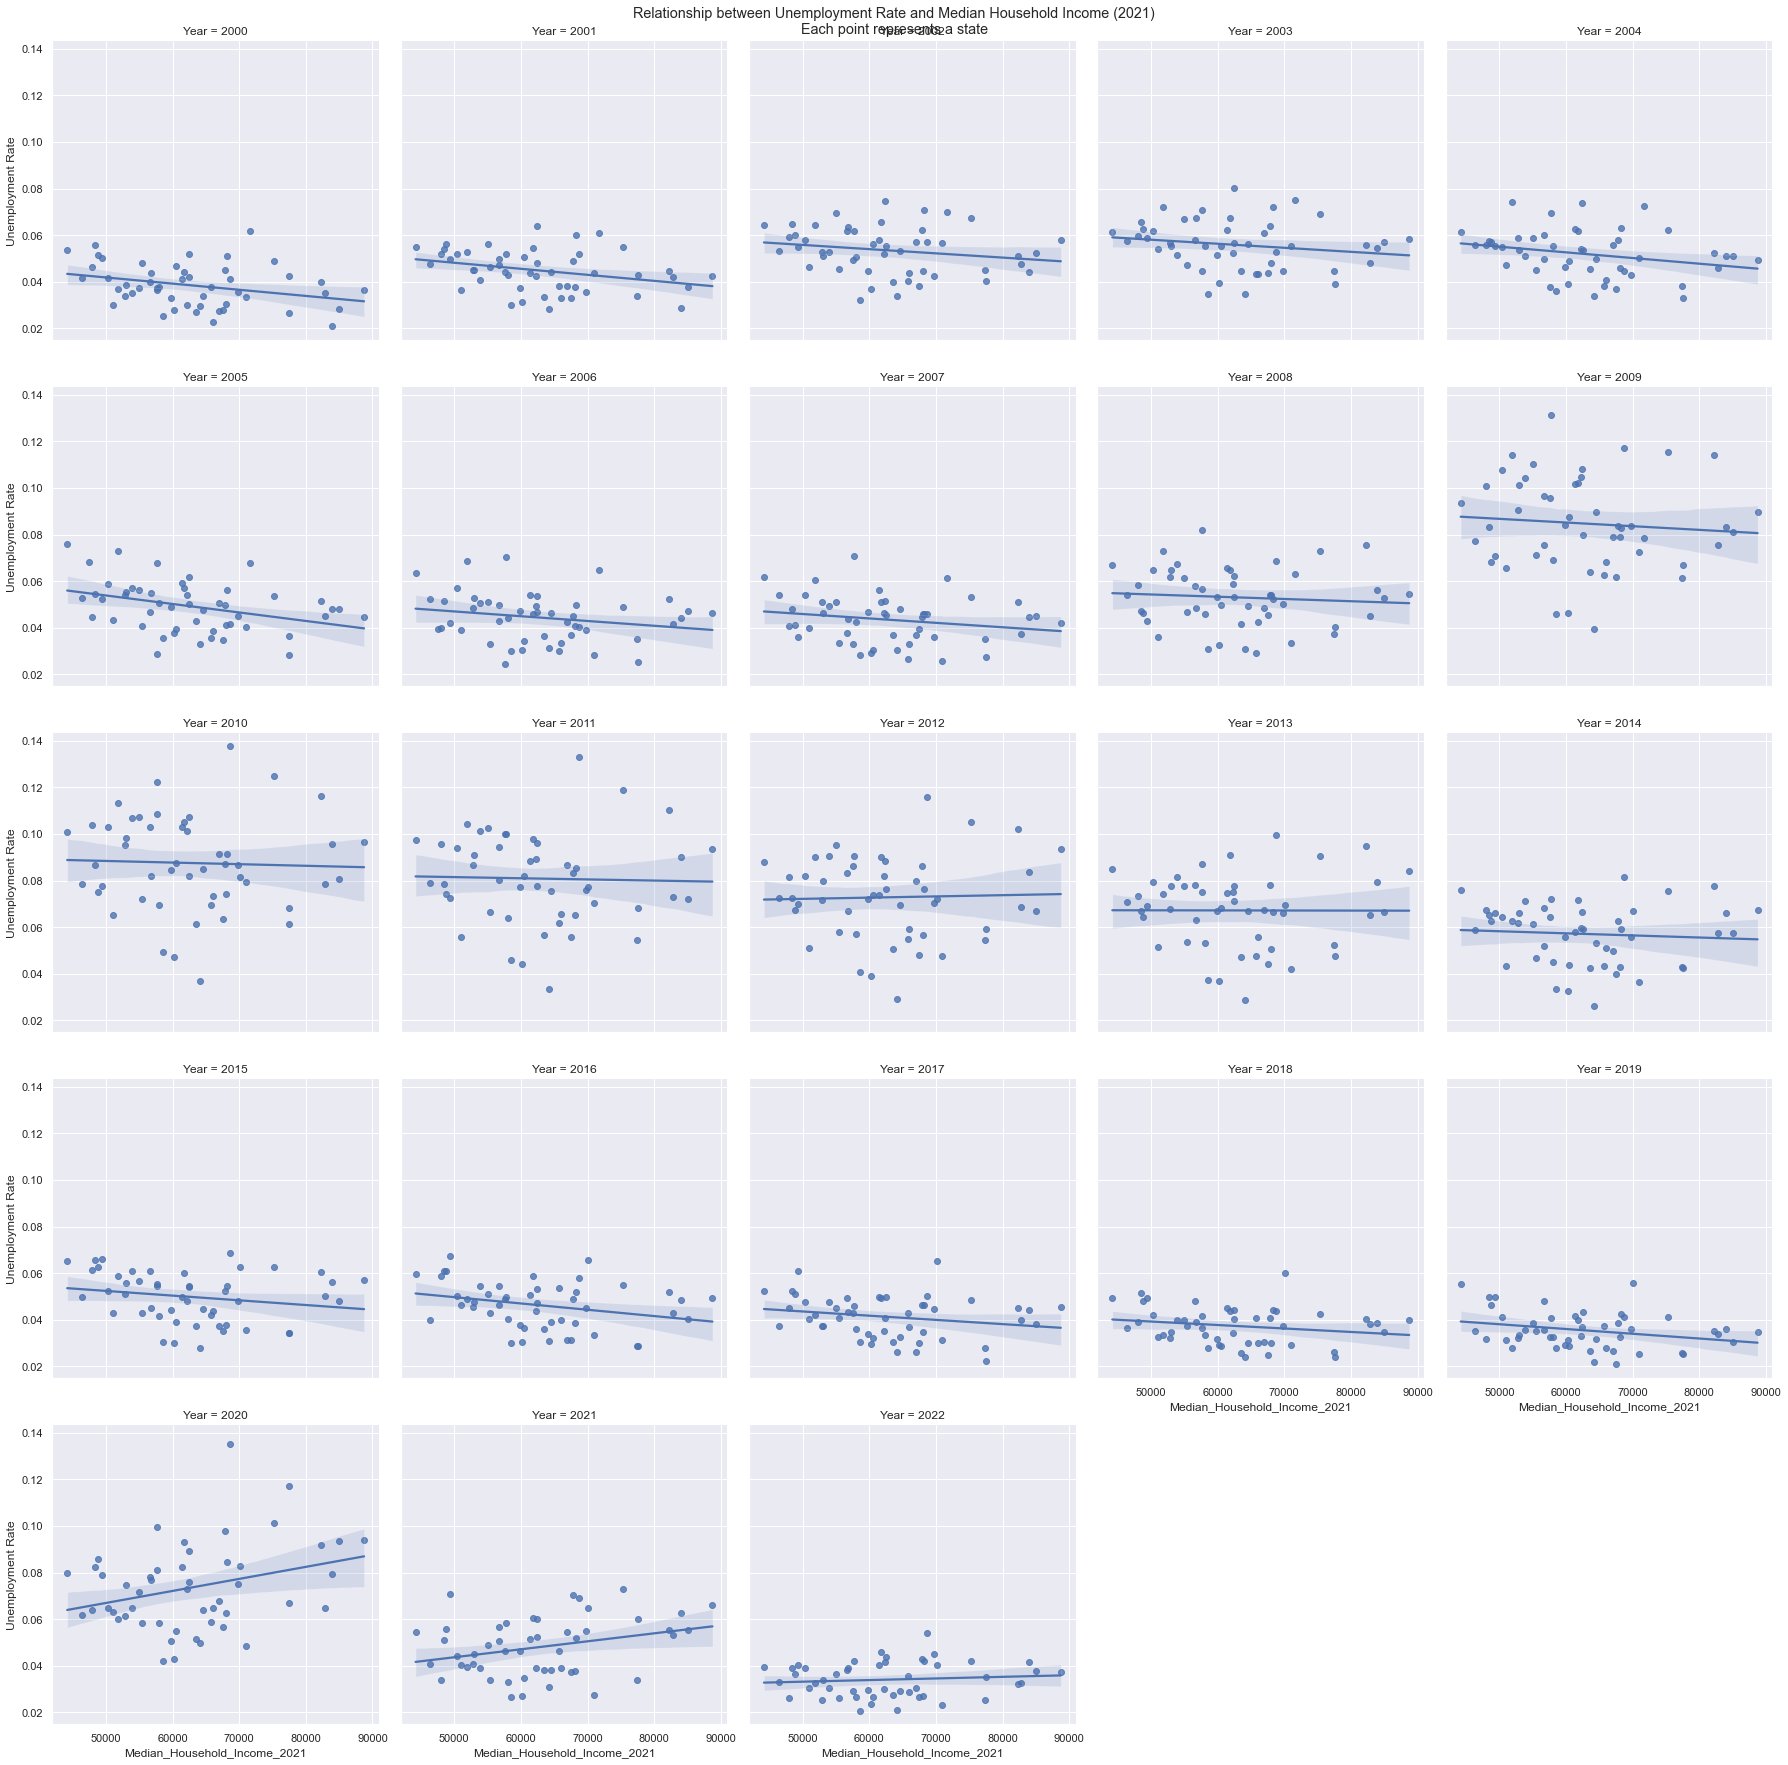

In [135]:
# Part E Show any relationship between Median_Household_income and unemployment rate at a state level
# To do this, let's create a scatter plot of states and their unemployment rate, faceted by year
df_employment = df.groupby(["State","Year"])[["Employed","Unemployed","Median_Household_Income_2021"]].mean().reset_index()
df_employment["Unemployment Rate"] = df_employment.Unemployed/(df_employment.Employed + df_employment.Unemployed)
sns.lmplot(data=df_employment,x="Median_Household_Income_2021",y="Unemployment Rate",col="Year",col_wrap=5)
plt.suptitle("Relationship between Unemployment Rate and Median Household Income in each State (2021)")
plt.tight_layout()
plt.show()
# in most years, this is a negative relatinship, however, in 2020 and 2021 it was distinctly positive 